In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import xarray as xr
import matplotlib.colors as mcolors
import cmocean as cmo

In [2]:
data = xr.open_dataset("population_dataset.nc")

N = len(data.kappa)

print("Number of values:", N)

# print(data)

init_biomass = 6 # data.depth

diff_d = (data.biomass_d - init_biomass)/init_biomass
diff_m = (data.biomass_m - init_biomass)/init_biomass

# print(diff_m)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

<xarray.DataArray 'depth' (depth: 18)> Size: 72B
array([ 4.      ,  4.411765,  4.823529,  5.235294,  5.647059,  6.058824,
        6.470588,  6.882353,  7.294117,  7.705883,  8.117647,  8.529411,
        8.941176,  9.352942,  9.764706, 10.176471, 10.588235, 11.      ],
      dtype=float32)
Coordinates:
  * depth    (depth) float32 72B 4.0 4.412 4.824 5.235 ... 10.18 10.59 11.0
Attributes:
    units:    m


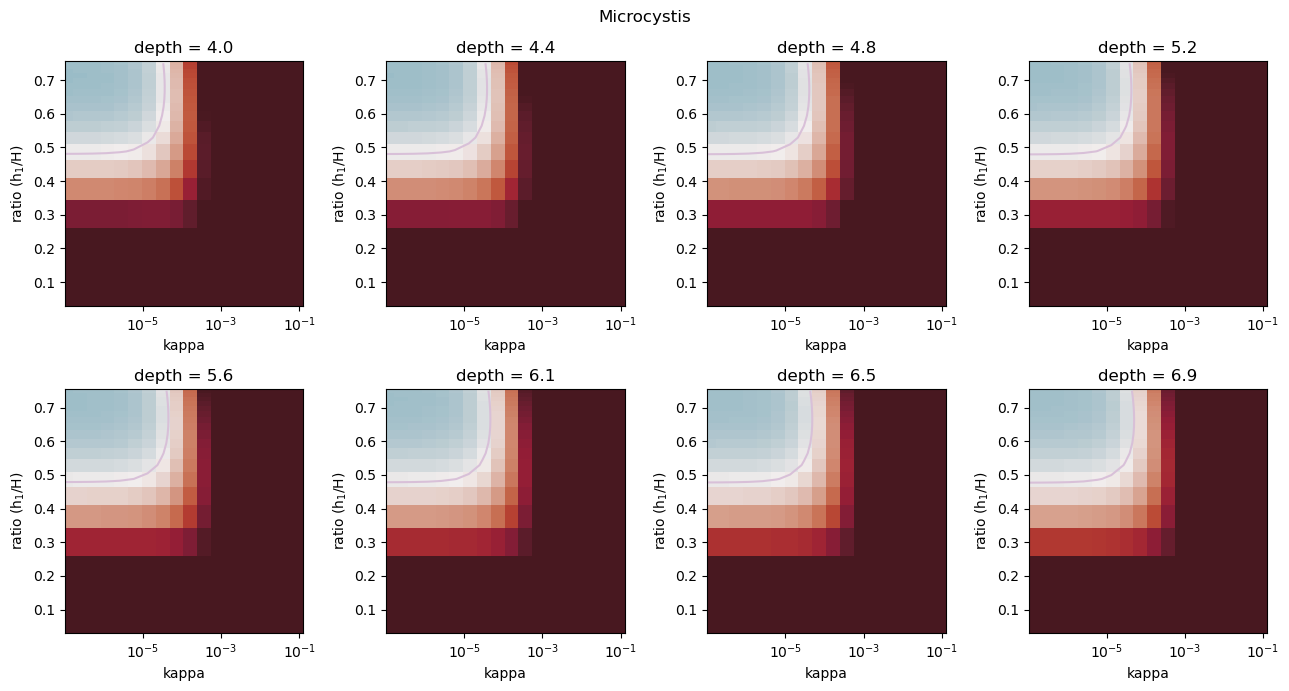

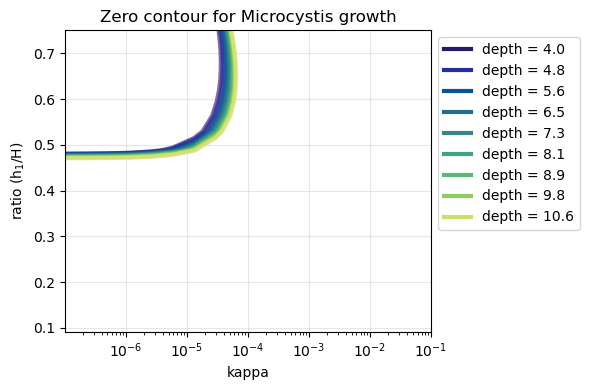

In [ ]:
def reshape_(data, N):
    return np.array(data).reshape(N, -1)


cmap = cmo.cm.balance
norm = mcolors.TwoSlopeNorm(vmin=-0.8, vcenter=0, vmax=0.8)

print(data.depth)

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(13, 7))

fig2 = plt.figure(figsize=(6, 4))
ax2 = fig2.add_subplot(111)

axs = axs.flatten()
# data0 = data.sel(drawdown=1, method="nearest")

for i in range(0,N): 

    data0 = data.isel(depth=i)
    
    labelx = "kappa" #"Diffusivity" 
    labely=  "ratio (h$_1$/H)" #"Ratio (h1/h2)"
    
    diff_m0 = diff_m.isel(depth=i)
    diff_d0 = diff_d.isel(depth=i)

    X = diff_m0.kappa.values 
    # Y = diff_m0.ratio.values 

    R = diff_m0.ratio.values
    H = diff_m0.depth.values
    h2 = H /(1 +  R)
    h1 = R  * h2 
    Y =  h1 / H


    Z = diff_m0

    var = data.depth.isel(depth=i).values

    if i<8:
        h = axs[i].pcolormesh(X,Y, reshape_(Z, N),
                    cmap=cmap, shading='auto', norm =norm, alpha=0.94)
        axs[i].contour(X,Y, reshape_(Z, N), levels=[0], colors='thistle', alpha=0.96)
        axs[i].set_title("depth = %2.1f"   % var)
    ax2.contour(X,Y, reshape_(Z, N), levels=[0], colors=cmo.cm.haline(i/N), alpha=0.6, linewidths=3)

    if i%2 ==0:
        ax2.plot([], [], color=cmo.cm.haline(i/N),  label="depth = %2.1f" % var, linewidth=3)
    # axs[i].set_ylim(0,1)
for ax in axs:
    ax.set_xlabel(labelx)
    ax.set_ylabel(labely)
    ax.set_xscale('log')
plt.tight_layout()

ax2.set_xscale('log')
ax2.grid(alpha=0.3)
ax2.set_xlabel(labelx)
ax2.set_ylabel(labely)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
ax2.set_title("Zero contour for Microcystis growth")
fig.suptitle("Microcystis")

plt.tight_layout()

fig.tight_layout()

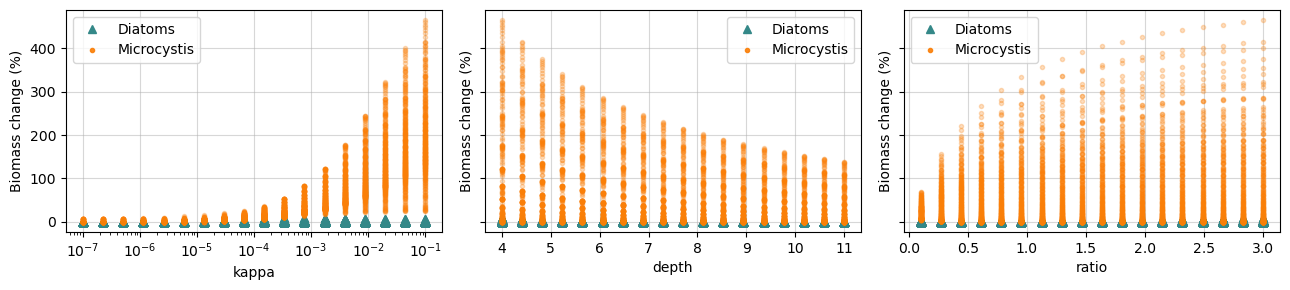

In [ ]:

# 0 : loss_diatoms
# 1 : loss_microcystis,  growth_microcystis, kappa, depth_ratio, total_depth
# 2 : growth_diatoms
# 3 : growth_microcystis
# 4 : kappa
# 5: depth_ratio
# 6 : total_depth

var_names = ["kappa", "depth", "ratio"]
nvar = len(var_names)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13, 3), sharey=True)
axs = axs.flatten()
for j in range(0,nvar):
    var = var_names[j]
    axs[j].set_xlabel(var_names[j])

    for i in range(0,N): 
        X = data[var][i].values
        diff_d0 = diff_d.isel({var:i}).values
        diff_m0 = diff_m.isel({var:i}).values

        X0 = np.zeros(diff_d0.shape)
        X0 += X 
        
        # print(X.flatten())

        axs[j].plot(X0.flatten(), diff_d0.flatten(), '^', color="#348888")
        axs[j].plot(X0.flatten() ,diff_m0.flatten(), '.', color="#FA7F08", alpha=0.26)

    
    
axs[0].set_xscale('log')

for ax in axs[0:7]:
    ax.grid(alpha=0.5)
    ax.plot([], [], '^', color="#348888", label="Diatoms")
    ax.plot([], [], '.', color="#FA7F08", alpha=0.9, label="Microcystis")
    ax.legend()
    ax.set_ylabel("Biomass change (%)")
plt.tight_layout()


kappa
depth
ratio


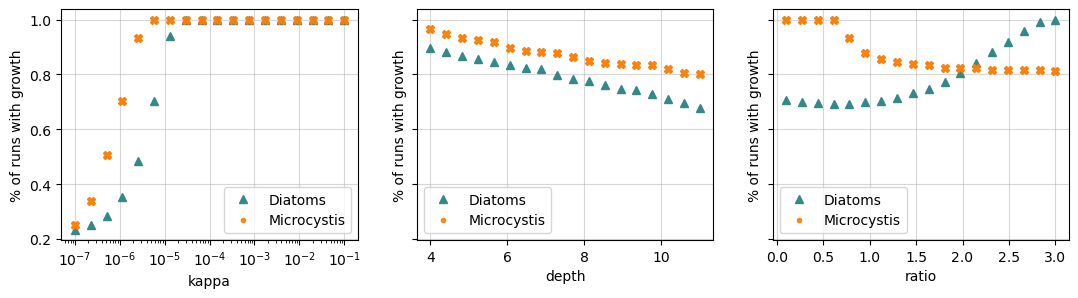

In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13, 3), sharey=True)
axs = axs.flatten()
for j in range(0,nvar):
    var = var_names[j]
    print(var_names[j])

    axs[j].set_xlabel(var_names[j])
    for i in range(0,N): 

        X = data[var][i].values

        diff_d0 = diff_d.isel({var:i}).values.flatten()
        diff_m0 = diff_m.isel({var:i}).values.flatten()

        diff_d0 = np.sum(diff_d0>0.0)/len(diff_d0)
        diff_m0 = np.sum(diff_m0>0.0)/len(diff_m0)

        X = np.unique(X)
        axs[j].plot(X, diff_d0.flatten(), '^', color="#348888")
        axs[j].plot(X, diff_m0.flatten(), 'X', color="#FA7F08", alpha=0.96)

axs[0].set_xscale('log')

for ax in axs:
    ax.grid(alpha=0.5)
    ax.plot([], [], '^', color="#348888", label="Diatoms")
    ax.plot([], [], '.', color="#FA7F08", alpha=0.9, label="Microcystis")
    ax.legend()
    ax.set_ylabel(r"% of runs with growth")


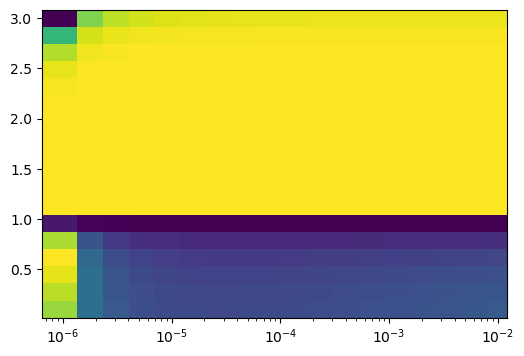

In [ ]:
init = 1e-4
n1 = init
n2 = init
m1 = init 
m2 = init*0.1
h1 = init
h2 = init
d1 = init 

hr2s = 1/3600
wm = 0.5 * hr2s
wd = 0.05 * hr2s

ld = 0.006 * hr2s
lm  = 0.004 * hr2s
growth_m = 0.05 * hr2s
growth_d = 0.008 * hr2s
ratio = np.linspace(0.1, 3, N) 
kappa = np.logspace(-6, -2, N)

output = np.zeros((N, N))
depth = 6 
for i in range(0,N):
    R = ratio[i]
    h2 = depth/(1 + R)
    h1 = R * h2 
    B = wm/h2 
    for j in range(0,N):
        A = kappa[j]/h1 
        lhs = n1**2 * n2 * A * growth_m  \
                +  n1**2 * d1 * growth_m * growth_d \
                + m2 * (3*A*B/R + 3*A**2 + 4*lm*B/R + B**2/R + 2*A*B + A**2*R + 2*A*lm + 2*A**2*lm) 
        rhs = m1 * (2*A**2*lm + 3*A**2 + 4*A*lm + 3*lm**2 + A*B + A**2*R) \
                + m2 * n1 * (growth_m*B/R + A*growth_m) \
                + n1 * n2 * A * growth_m 

        equation = lhs - rhs
        output[j,i] = equation

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

ind = output>0 
import numpy.ma as ma

output_p = ma.array(output,mask=output>0)  
output_n = ma.array(output,mask=output<0)  

ax.pcolormesh(kappa, ratio, output_p, color="#F2B705", shading='auto', linewidth=0.0)
ax.pcolormesh(kappa, ratio, output_n, color="#0396A6", shading='auto', linewidth=0.0)

ax.set_xscale('log')


In [86]:

dst = xr.open_dataset("population_dataset_time.nc")

N = len(dst.kappa)
NT = len(dst.t)

Number of values: 15
<xarray.Dataset> Size: 24MB
Dimensions:    (ratio: 15, kappa: 15, depth: 15, t: 300)
Coordinates:
  * ratio      (ratio) float32 60B 0.1 0.1571 0.2143 ... 0.7857 0.8429 0.9
  * kappa      (kappa) float32 60B 0.1 0.03728 0.01389 ... 2.683e-07 1e-07
  * depth      (depth) float32 60B 4.0 4.5 5.0 5.5 6.0 ... 9.5 10.0 10.5 11.0
  * t          (t) int64 2kB 0 963 1926 2890 ... 285110 286074 287037 288000
Data variables:
    biomass_d  (t, depth, ratio, kappa) float64 8MB ...
    biomass_m  (t, depth, ratio, kappa) float64 8MB ...
    nutrient   (t, depth, ratio, kappa) float64 8MB ...
<xarray.DataArray 't' (t: 300)> Size: 2kB
array([     0,    963,   1926, ..., 286074, 287037, 288000], shape=(300,))
Coordinates:
  * t        (t) int64 2kB 0 963 1926 2890 3853 ... 285110 286074 287037 288000
Attributes:
    units:    s


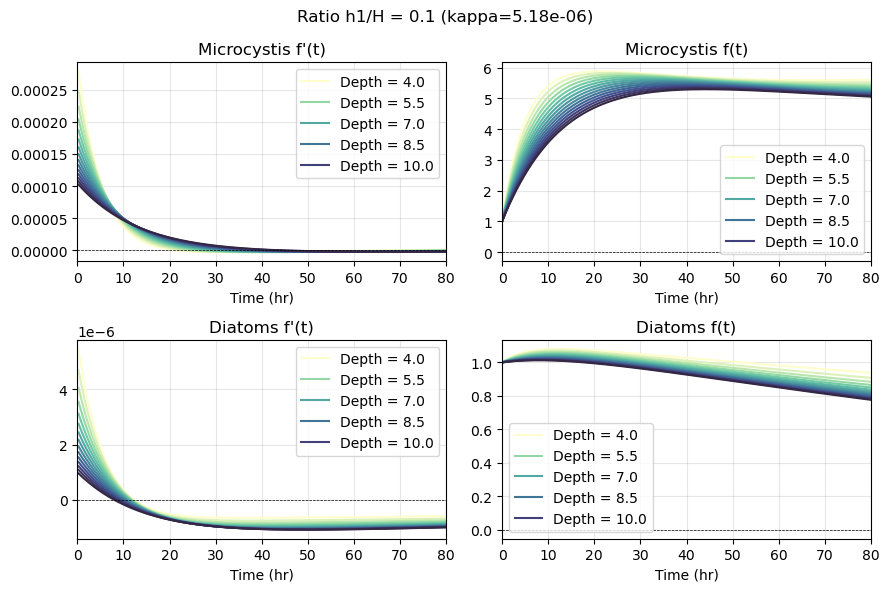

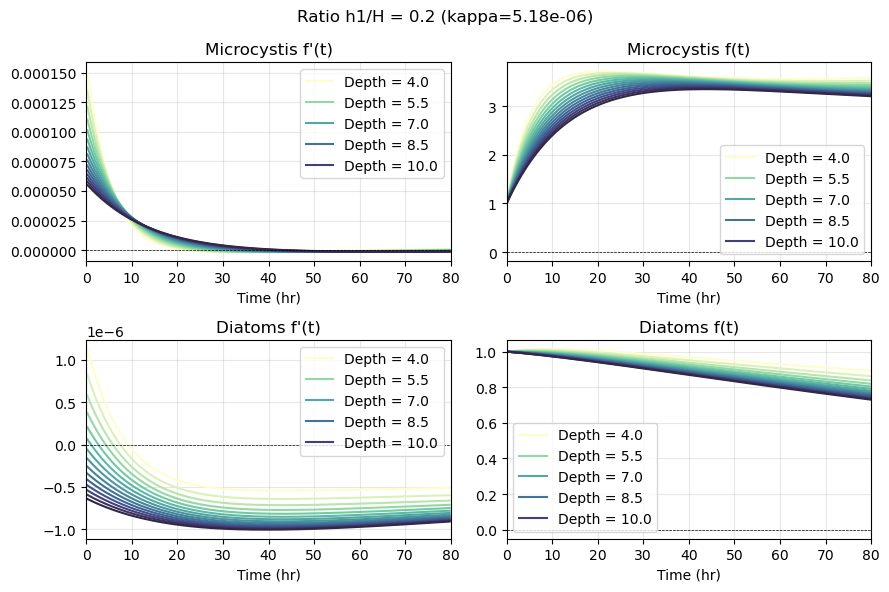

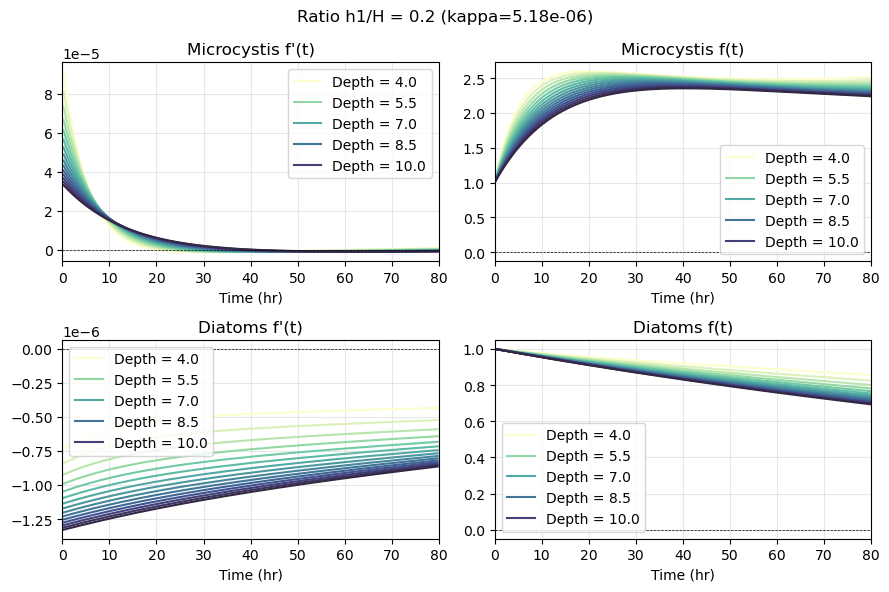

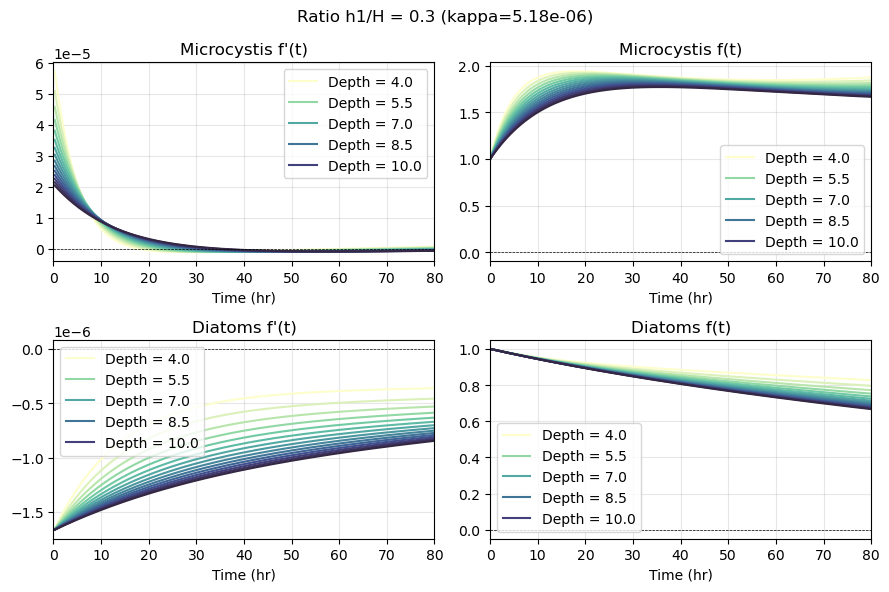

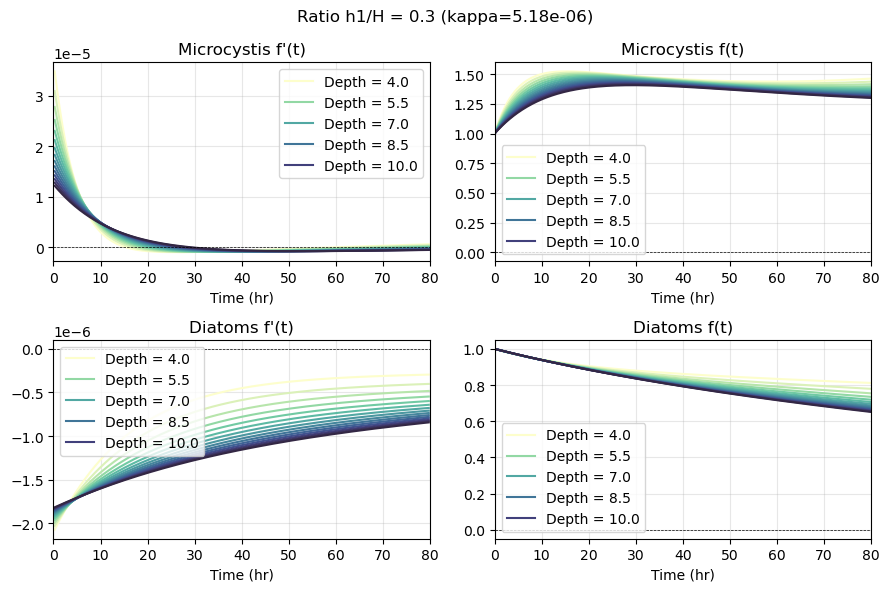

In [ ]:


dt = dst.t.values[1] - dst.t.values[0]  # Time step in seconds


print("Number of values:", N)

print(dst)

print(dst.t)
time = dst.t.values
tx = time / 3600  # Convert time to hours

# ax.set_xlim(0, 3600*4)
ik = 10

for j in range(0,5):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=False)
    axs = axs.flatten()
    ratio = dst.ratio.values[j]
    
    for i in range(0,N): 
        depth = dst.depth.values[i]

        diff_d = dst.biomass_d.values[:, i,j,ik]
        diff_m = dst.biomass_m.values[:, i,j,ik] 
        dm1dt = np.squeeze((diff_m[1:-1] - diff_m[0:-2])/dt) 
        dd1dt = np.squeeze((diff_d[1:-1] - diff_d[0:-2])/dt)
        
        # (time, depth, ratio, kappa) 
        if i%3 == 0:
            axs[0].plot(tx[1:-1], dm1dt,  color=cmo.cm.deep(i/N), label = "Depth = %2.1f" % depth)
            axs[1].plot(tx, diff_m,  color= cmo.cm.deep(i/N), label = "Depth = %2.1f" % depth)
            axs[2].plot(tx[1:-1], dd1dt,  color= cmo.cm.deep(i/N), label = "Depth = %2.1f" % depth)
            axs[3].plot(tx, diff_d,  color= cmo.cm.deep(i/N), label = "Depth = %2.1f" % depth)
        else:
            axs[0].plot(tx[1:-1], dm1dt, color=cmo.cm.deep(i/N))
            axs[1].plot(tx, diff_m,  color= cmo.cm.deep(i/N))
            axs[2].plot(tx[1:-1], dd1dt,  color= cmo.cm.deep(i/N))
            axs[3].plot(tx, diff_d,  color= cmo.cm.deep(i/N))
    
    for ax in axs:
        ax.grid(alpha=0.3)
        ax.set_xlabel("Time (hr)")
        ax.set_xlim(0, tx[-1])
        ax.hlines(0, 0, tx[-1], color='black', linestyle='--', linewidth=0.5)
        ax.legend()
        # ax.set_ylim(-10, 10)
    axs[2].set_title("Diatoms f'(t)")
    axs[3].set_title("Diatoms f(t)")
    axs[0].set_title("Microcystis f'(t)")
    axs[1].set_title("Microcystis f(t)")
    fig.suptitle("Ratio h1/H = %2.1f (kappa=%2.2e)" % (ratio, dst.kappa.values[ik]))
    plt.tight_layout()
# ax.set_yscale('log')


/tmp/ipykernel_513369/1653650315.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


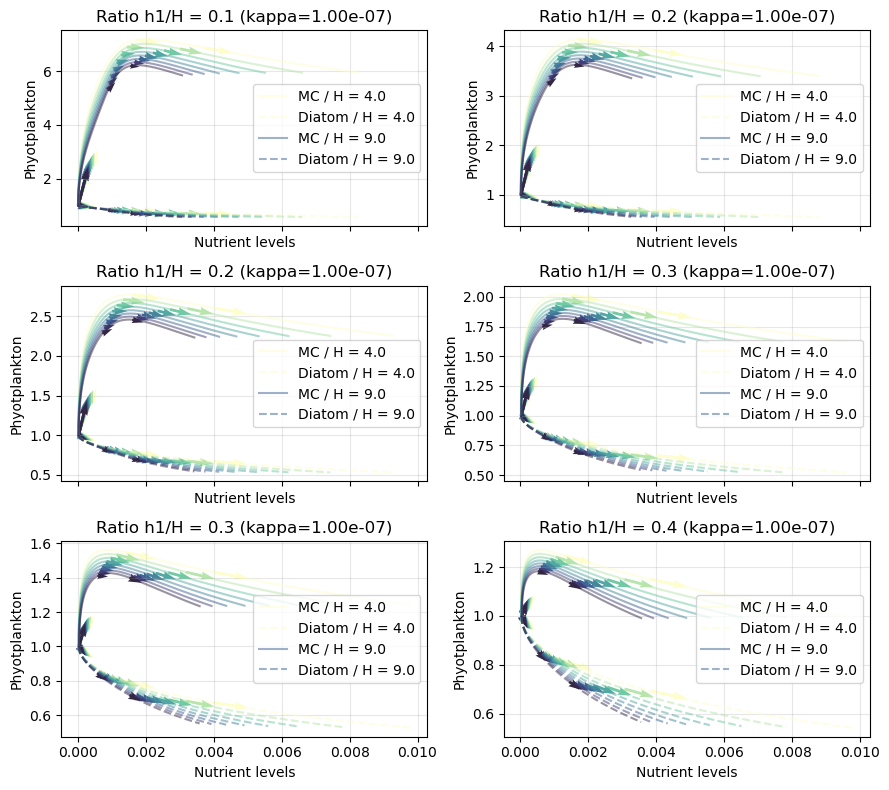

/tmp/ipykernel_513369/2979190150.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


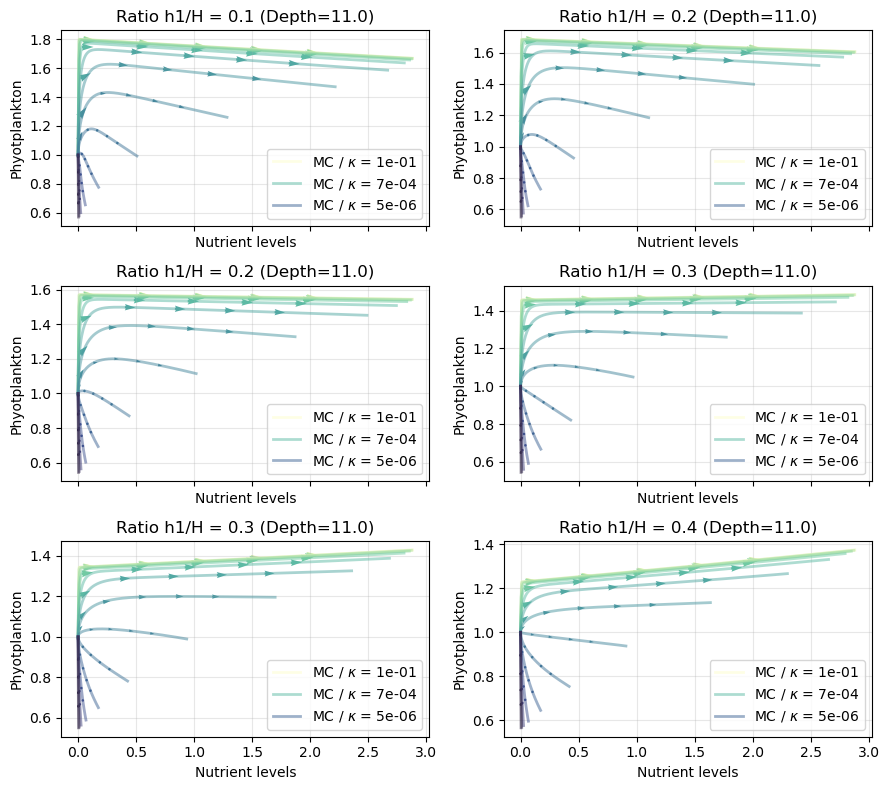

In [105]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(9, 8), sharey=False, sharex=True)
axs = axs.flatten()

id0 = 14 #14
for j in range(0,6):
    ratio = dst.ratio.values[j]
    axs[j].set_title("Ratio h1/H = %2.1f (Depth=%2.1f)" % (ratio, dst.depth.values[id]))

    for i in range(0,N): 
        kappa = dst.kappa.values[i]
        diff_d = dst.biomass_d.values[:, id0,j,i]
        diff_m = dst.biomass_m.values[:, id0,j,i]  
        nutrient = dst.nutrient.values[:, id0,j,i]
        # (time, depth, ratio, kappa) 
        if i%5 == 0:
            axs[j].plot(nutrient, diff_d,  color= cmo.cm.deep(i/N), label = r"MC / $\kappa$ = %2.0e" % kappa, alpha=0.5, linewidth=2)
            # axs[j].plot(nutrient, diff_d, '--', color= cmo.cm.deep(i/N), label = r"Diatom / $\kappa$= %2.1e" % depth, alpha=0.5)

        else:
            # pass
            axs[j].plot(nutrient, diff_d, color=cmo.cm.deep(i/N), alpha=0.5, linewidth=2)
            # axs[j].plot(nutrient, diff_d, '--', color= cmo.cm.deep(i/N), alpha=0.5)
        
        step = 50
        axs[j].quiver( nutrient[5::step], diff_d[5::step],
            np.diff(nutrient[5::step], append=np.nan)/50,
            np.diff(diff_d[5::step], append=np.nan)/50,
            angles='xy',
            scale_units='width',
            scale=0.3,
            color=cmo.cm.deep(i/N))
        
        # step = 80
        # axs[j].quiver( nutrient[::step], diff_d[::step],
        #     np.diff(nutrient[::step], append=np.nan)/30,
        #     np.diff(diff_d[::step], append=np.nan)/30,
        #     angles='xy',
        #     scale_units='xy',
        #     scale=0.1,
            # color=cmo.cm.deep(i/N))

    for ax in axs:
        ax.grid(alpha=0.3)
        ax.set_xlabel("Nutrient levels")
        ax.set_ylabel("Phyotplankton")
        ax.legend()
        # ax.set_ylim(0,)
        # ax.set_xlim(0,)

    plt.tight_layout()
# ax.set_yscale('log')


ValueError: 'y' must be strictly increasing

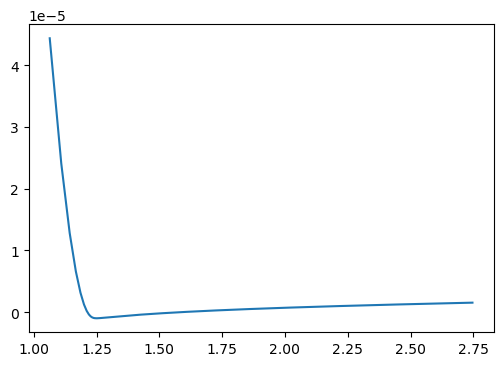

In [ ]:

i,j, ik = 5,5,5
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

for i in range(0,N):
    d1t = dst.biomass_d.values[:, i,j,ik]
    m1t = dst.biomass_m.values[:, i,j,ik] 
    dm1dt = np.squeeze((m1t[1:-1] - m1t[0:-2])/dt) 
    dd1dt = np.squeeze((d1t[1:-1] - d1t[0:-2])/dt)
    ax.plot(d1t[1:-1],dm1dt)
    ax.streamplot(d1t, m1t, dm1dt, dd1dt)
ax.set_yscale('log')

300


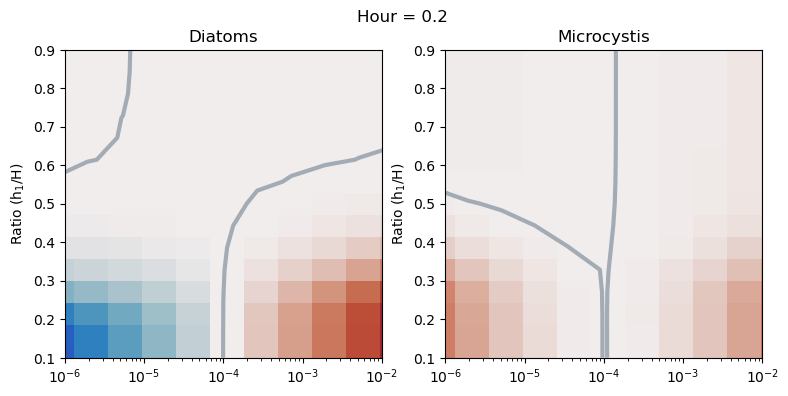

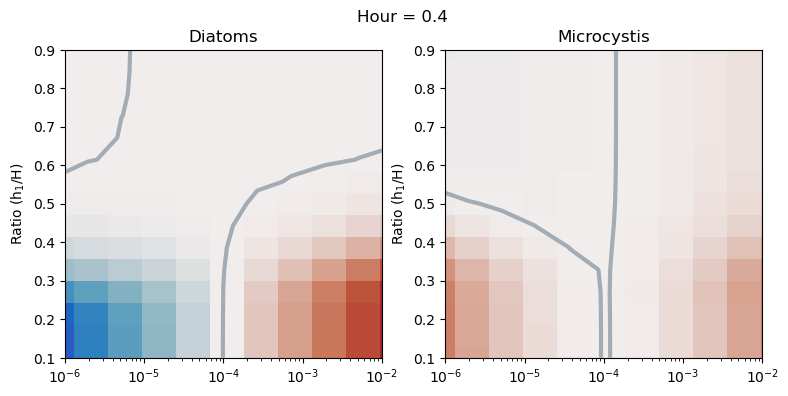

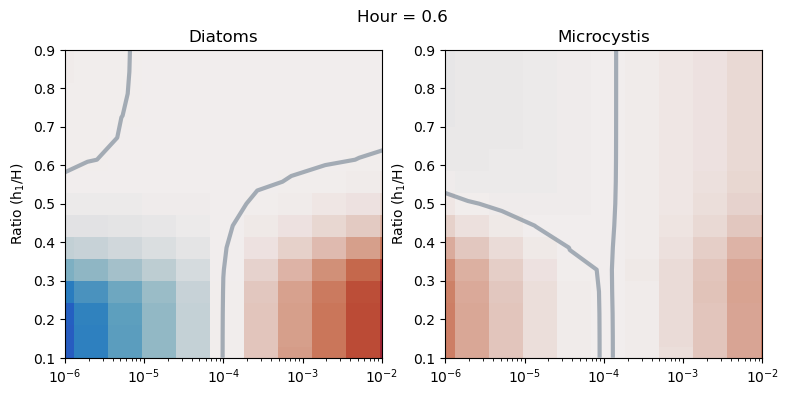

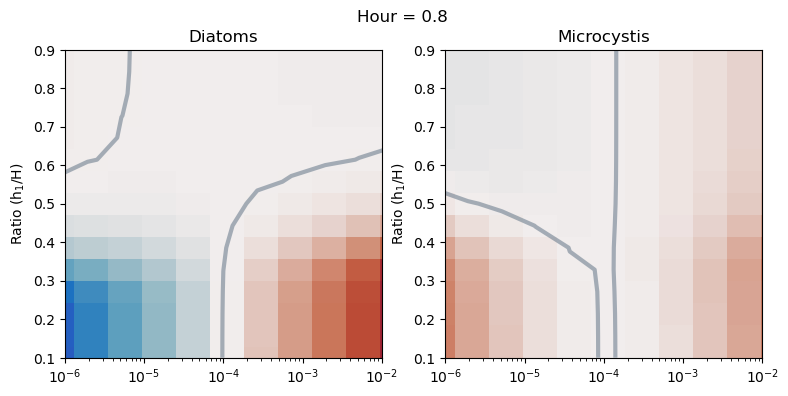

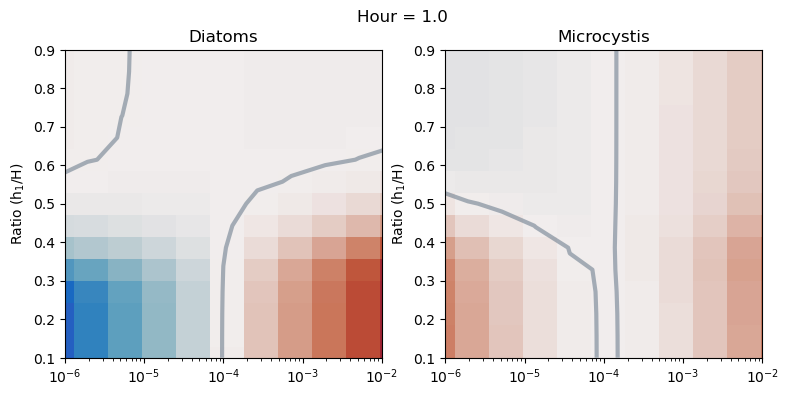

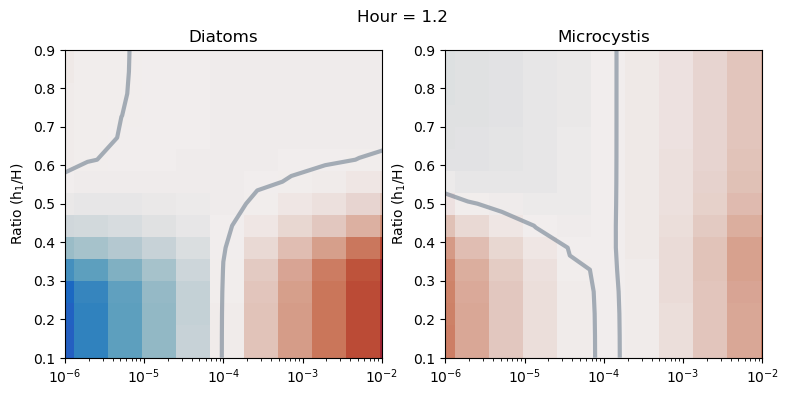

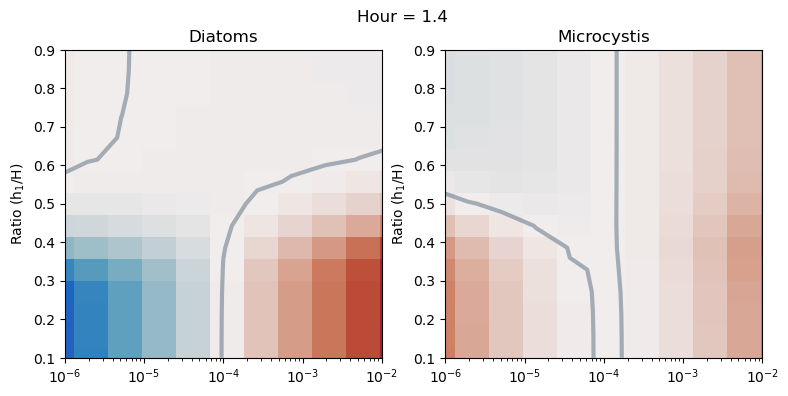

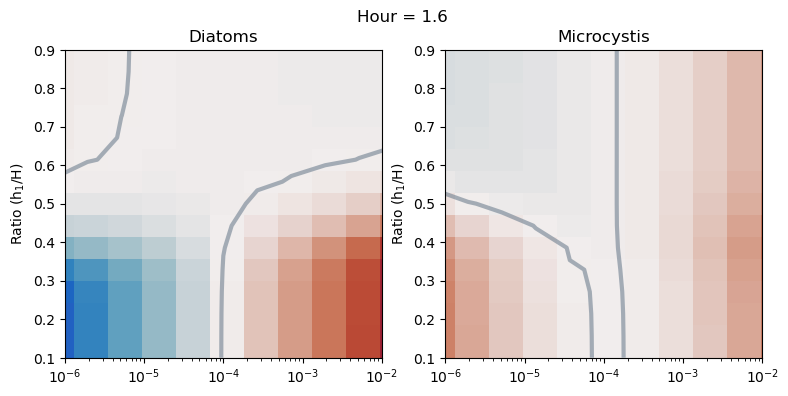

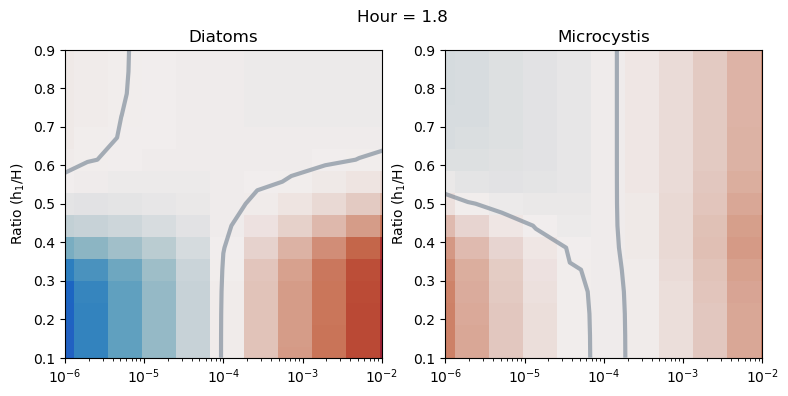

In [ ]:
# (time, depth, ratio, kappa)
N = len(dst.kappa)
NT = len(dst.t)
times = dst.t.values / 3600

cmap = cmo.cm.balance
norm = mcolors.TwoSlopeNorm(vmin=-0.8, vcenter=0, vmax=0.8)


kappa = dst.kappa.values 
ratio = dst.ratio.values

print(NT)
for i in range(1, 10, 1):
    time = times[i]
    fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
    # biomass_d (time, depth, ratio, kappa) 
    diff_d1 = dst.biomass_d.isel(t=i)
    diff_m1 = dst.biomass_m.isel(t=i)
    
    H = dst.depth.values
    # h2 = H /(1 +  R)
    # h1 = R  * h2 
    # ratio = h1 / H #  dst.ratio.values  #

    Z = (diff_d1.isel(depth=8) - 6)/6  # Normalize to initial biomass
    Z = Z.values
    axs[0].contour(kappa, ratio, Z.T, levels=[0], colors='slategray', alpha=0.6, linewidths=3)
    axs[0].pcolormesh(kappa, ratio, Z.T, cmap=cmap, shading='auto', norm =norm, alpha=0.94)
    axs[0].set_title("Diatoms")

    Z = (diff_m1.isel(depth=8) - 6)/6  # Normalize to initial biomass
    Z = Z.values
    axs[1].contour(kappa, ratio, Z.T, levels=[0], colors='slategray', alpha=0.6, linewidths=3)
    axs[1].pcolormesh(kappa, ratio, Z.T, cmap=cmap, shading='auto', norm =norm, alpha=0.94)
    axs[1].set_title("Microcystis")

    for ax in axs:
        ax.set_xscale('log')
        ax.set_xlim(1e-6, 1e-2)
        ax.set_ylim(0.1, 0.9)
        ax.set_ylabel("Ratio (h$_1$/H)")#h$_2$)")
        ax.set_xlabel("kappa")
        
    fig.suptitle("Hour = %2.1f" % time)
    # if i%2 ==0:
    #     ax2.plot([], [], color=cmo.cm.haline(i/N),  label="depth = %2.1f" % var, linewidth=3)


300
mean growth
(15, 15)
mean growth
(15, 15)
mean growth
(15, 15)
mean growth
(15, 15)
mean growth
(15, 15)
mean growth
(15, 15)
mean growth
(15, 15)
mean growth
(15, 15)
mean growth
(15, 15)
mean growth
(15, 15)


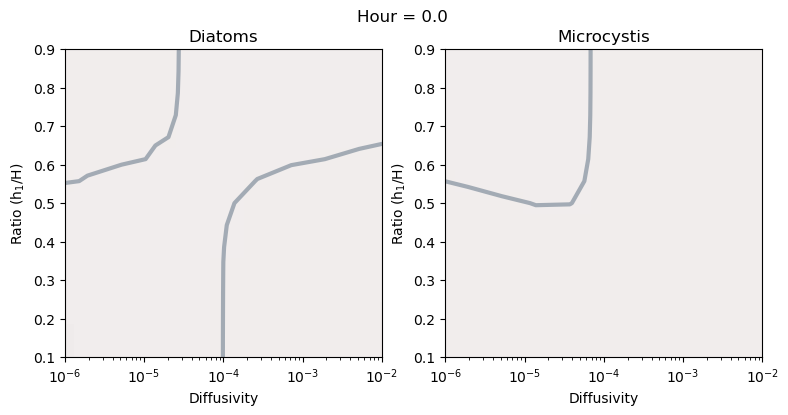

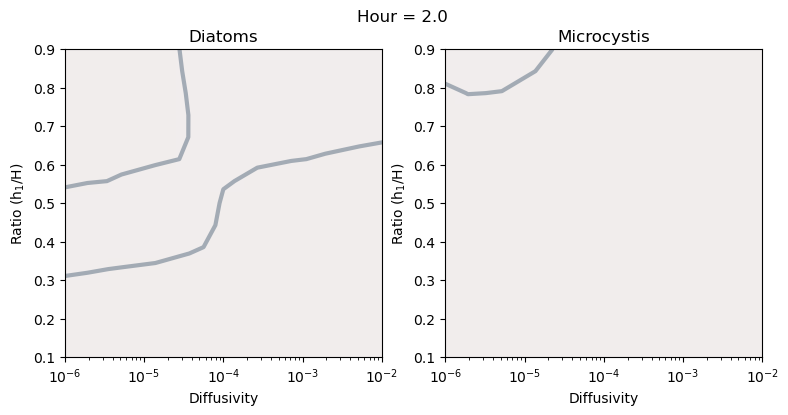

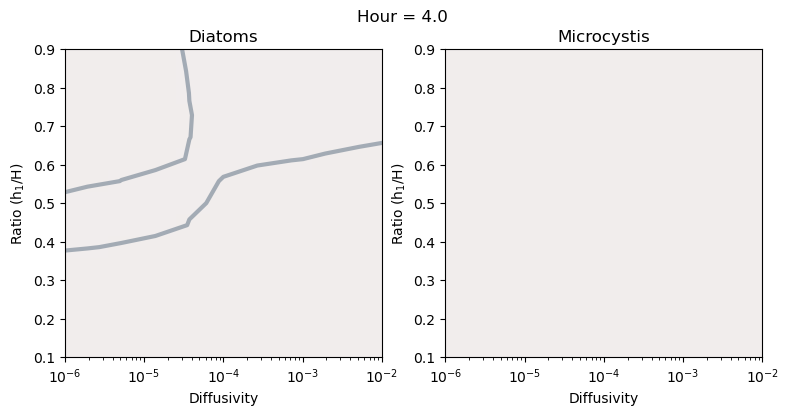

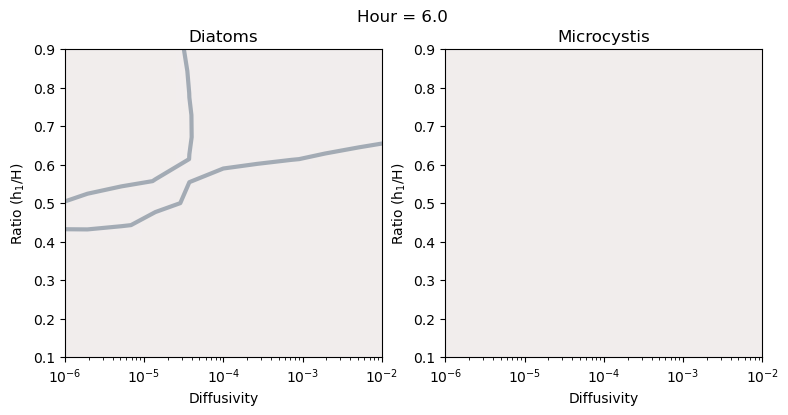

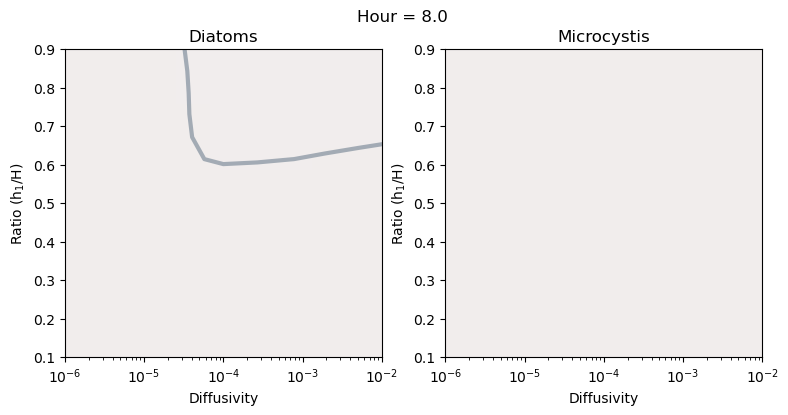

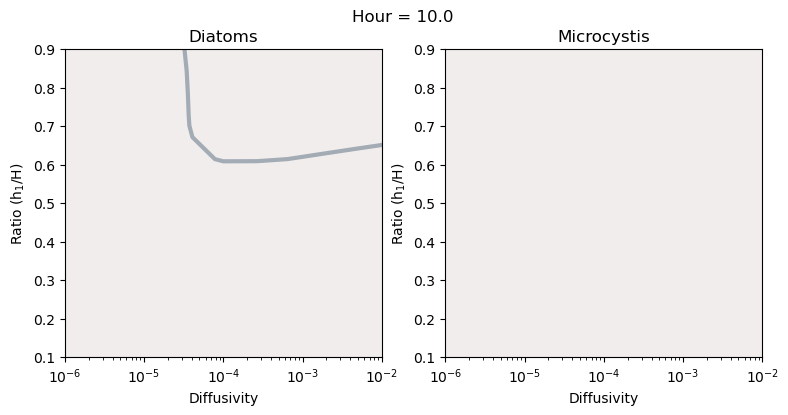

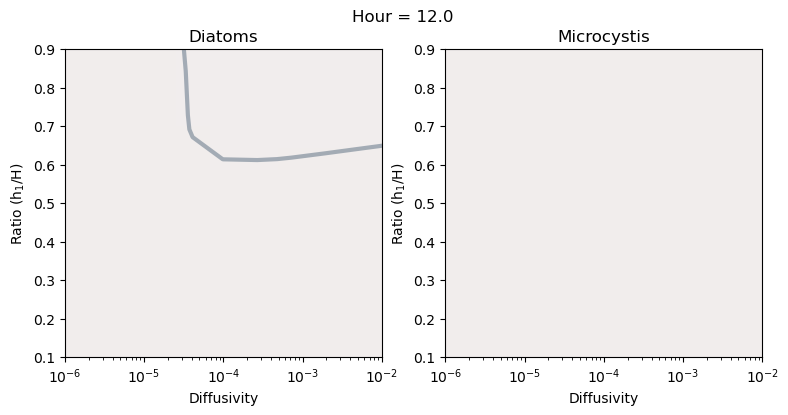

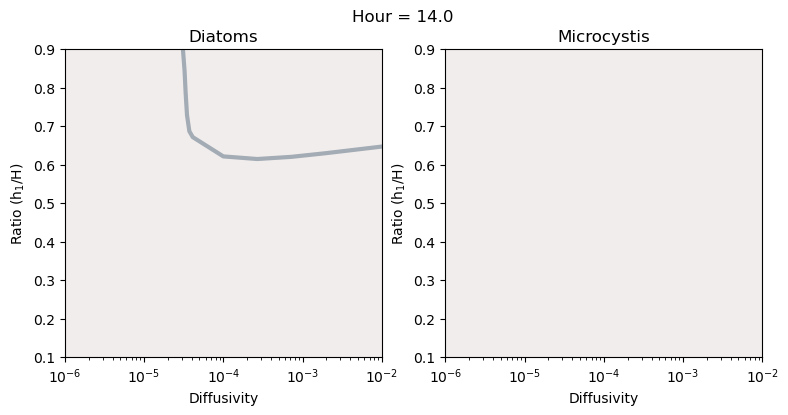

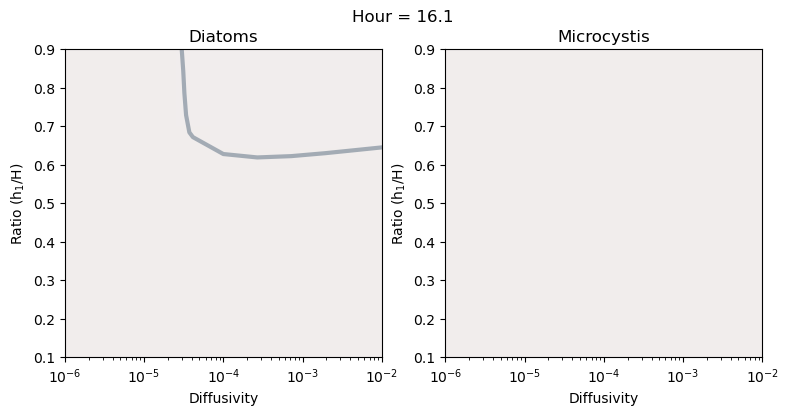

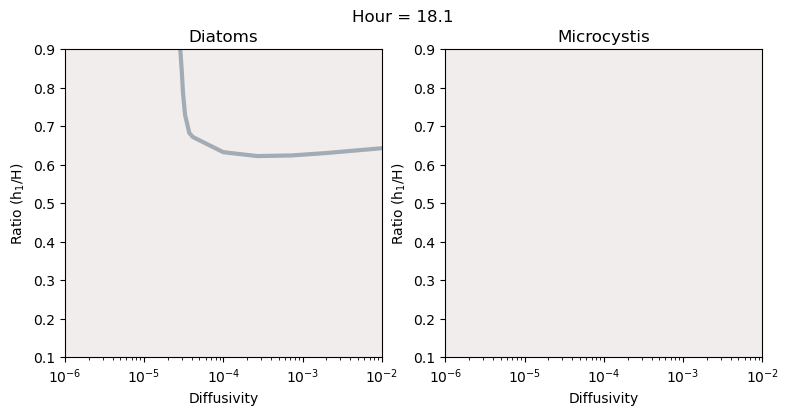

In [ ]:
# (time, depth, ratio, kappa)
N = len(dst.kappa)
NT = len(dst.t)
times = dst.t.values / 3600

cmap = cmo.cm.balance
norm = mcolors.TwoSlopeNorm(vmin=-1e-4, vcenter=0, vmax=1e-4)

# (t, depth, ratio, kappa)
# time, depth, ratio, kappa
# d_d1 = (dst.biomass_d[1:, : ,: , :] -  dst.biomass_d[0:-1, : ,: , :])/dt 
# d_m1 = (dst.biomass_m[1:, : ,: , :] -  dst.biomass_m[0:-1, : ,: , :])/dt 
# print(sum(d_d1>0)) 

kappa = dst.kappa.values 
ratio = dst.ratio.values

id = 3 
print(NT)
for i in range(0, 100, 10):
    time = times[i]
    fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
    # biomass_d (time, depth, ratio, kappa) 
    diff_d1 = (dst.biomass_d[i+1, id ,: , :] -  dst.biomass_d[i, id ,: , :])/dt 
    diff_m1 = (dst.biomass_m[i+1, id ,: , :] -  dst.biomass_m[i, id ,: , :])/dt 
    
    H = dst.depth.values
    print("mean growth")
    # print(np.mean(diff_m1.values))

    Z = diff_d1
    Z = Z.values
    print(Z.shape)
    axs[0].contour(kappa, ratio, Z.T, levels=[0], colors='slategray', alpha=0.6, linewidths=3)
    axs[0].pcolormesh(kappa, ratio, Z.T, cmap=cmap, shading='auto', norm =norm, alpha=0.94)
    axs[0].set_title("Diatoms")

    Z = diff_m1
    Z = Z.values
    axs[1].contour(kappa, ratio, Z.T, levels=[0], colors='slategray', alpha=0.6, linewidths=3)
    axs[1].pcolormesh(kappa, ratio, Z.T, cmap=cmap, shading='auto', norm =norm, alpha=0.94)
    axs[1].set_title("Microcystis")

    for ax in axs:
        ax.set_xscale('log')
        ax.set_xlim(1e-6, 1e-2)
        ax.set_ylim(0.1, 0.9)
        ax.set_ylabel("Ratio (h$_1$/H)")#h$_2$)")
        ax.set_xlabel("Diffusivity")
        
    fig.suptitle("Hour = %2.1f" % time)
    # if i%2 ==0:
    #     ax2.plot([], [], color=cmo.cm.haline(i/N),  label="depth = %2.1f" % var, linewidth=3)
